In [2]:
import pandas as pd
import numpy as np

import os 

import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

# **Read Dataset**

In [6]:
train_path = '../input/fruits/fruits-360_dataset/fruits-360/Training/'
test_path = '../input/fruits/fruits-360_dataset/fruits-360/Test/'

In [7]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(128,128))

# **Shape Image**

In [8]:
image_shape = img_to_array(img)

# **Number of Class**

In [9]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


# **Model**

In [10]:
batch_size = 32
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=image_shape.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = image_shape.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size = image_shape.shape[:2],
                                                  batch_size = batch_size,
                                                  color_mode= "rgb",
                                                  class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [12]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam", #rmsprop
             metrics = ["accuracy"])

In [13]:
early = EarlyStopping(monitor='val_loss',patience=5)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, mil_lr=0.001)

In [14]:
hist = model.fit_generator(generator = train_generator,
                           steps_per_epoch = 1600 // batch_size,
                           epochs = 50,
                           validation_data = test_generator,
                           validation_steps = 800 // batch_size,
                           callbacks=[early, reduce])

Epoch 1/50
50/50 [==============================] - 26s 384ms/step - loss: 4.8959 - accuracy: 0.0174 - val_loss: 4.4094 - val_accuracy: 0.0400
Epoch 2/50
50/50 [==============================] - 18s 362ms/step - loss: 4.2342 - accuracy: 0.0587 - val_loss: 3.3848 - val_accuracy: 0.1988
Epoch 3/50
50/50 [==============================] - 17s 351ms/step - loss: 3.2982 - accuracy: 0.1642 - val_loss: 2.4806 - val_accuracy: 0.3237
Epoch 4/50
50/50 [==============================] - 17s 349ms/step - loss: 2.6276 - accuracy: 0.2739 - val_loss: 1.6701 - val_accuracy: 0.5412
Epoch 5/50
50/50 [==============================] - 17s 340ms/step - loss: 1.9535 - accuracy: 0.4130 - val_loss: 1.3465 - val_accuracy: 0.6075
Epoch 6/50
50/50 [==============================] - 17s 337ms/step - loss: 1.7793 - accuracy: 0.4736 - val_loss: 1.2171 - val_accuracy: 0.6675
Epoch 7/50
50/50 [==============================] - 16s 325ms/step - loss: 1.6347 - accuracy: 0.4956 - val_loss: 0.9225 - val_accuracy: 0.7125

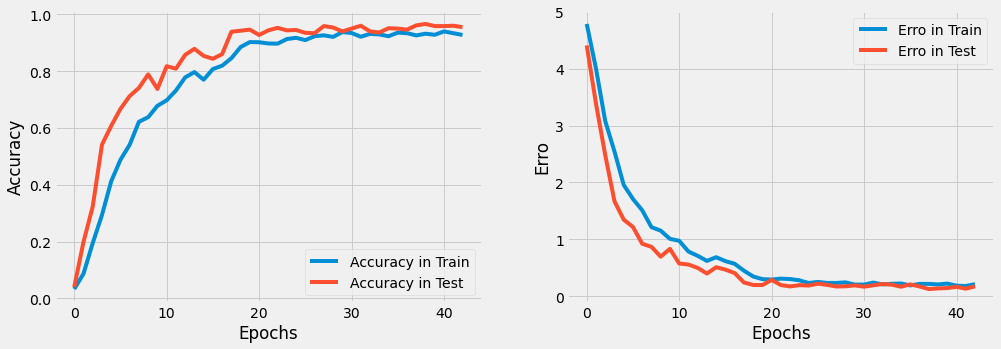

In [15]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(hist.history['accuracy'])
axes[0].plot(hist.history['val_accuracy'])
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Accuracy in Train','Accuracy in Test'])
axes[0].grid(True)

axes[1].plot(hist.history['loss'])
axes[1].plot(hist.history['val_loss'])
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Erro')
axes[1].legend(['Erro in Train','Erro in Test'])
axes[1].grid(True)